In [1]:
!pip install -U scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 21.4 MB/s eta 0:00:00m eta 0:00:010:00:01
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)
  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)


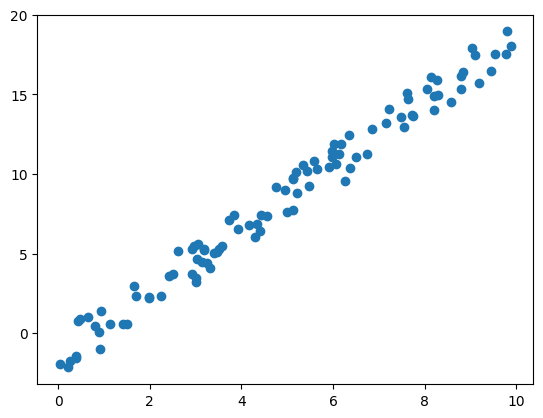

In [2]:
import numpy as np
import matplotlib.pyplot as plt
r = np.random.RandomState(10)
x = 10 * r.rand(100)
y = 2 * x - 3 * r.rand(100)
plt.scatter(x,y)

In [3]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model

LinearRegression()

In [4]:
X = x.reshape(100,1)

In [5]:
model.fit(X,y)

LinearRegression()

In [6]:
x_new = np.linspace(-1, 11, 100)
X_new = x_new.reshape(100,1)
y_new = model.predict(X_new)

In [7]:
X_ = x_new.reshape(-1,1)
X_.shape

(100, 1)

In [8]:
# Q. 아래 mse를 구하는 과정을 직접 구현해보세요.
from sklearn.metrics import mean_squared_error

error = mean_squared_error(y, y_new)

print(error)

86.47192574433807


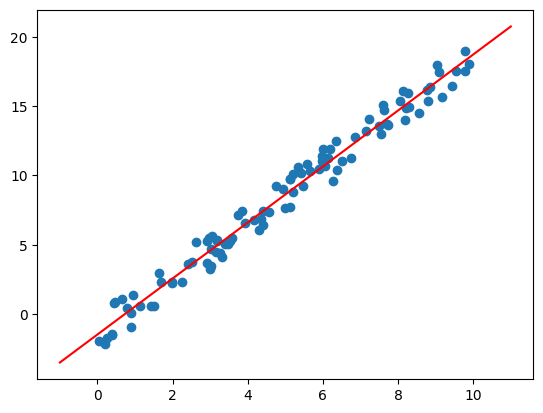

In [9]:
plt.scatter(x, y, label='input data')
plt.plot(X_new, y_new, color='red', label='regression line')

## 6.7

In [10]:
from sklearn.datasets import load_wine
data = load_wine()
type(data)

sklearn.utils._bunch.Bunch

## 6.8 - practice

In [11]:
import pandas as pd

pd.DataFrame(data.data, columns=data.feature_names)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [12]:
X = data.data
y = data.target

In [13]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

In [14]:
model.fit(X, y)

RandomForestClassifier()

In [15]:
y_pred = model.predict(X)

In [16]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

#타겟 벡터 즉 라벨인 변수명 y와 예측값 y_pred을 각각 인자로 넣습니다. 
print(classification_report(y, y_pred))
#정확도를 출력합니다. 
print("accuracy = ", accuracy_score(y, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        59
           1       1.00      1.00      1.00        71
           2       1.00      1.00      1.00        48

    accuracy                           1.00       178
   macro avg       1.00      1.00      1.00       178
weighted avg       1.00      1.00      1.00       178

accuracy =  1.0


## 6.10

In [17]:
from sklearn.datasets import load_wine
data = load_wine()
print(data.data.shape)
print(data.target.shape)

(178, 13)
(178,)


In [18]:
X_train = data.data[:142]
X_test = data.data[142:]
print(X_train.shape, X_test.shape)

(142, 13) (36, 13)


In [19]:
y_train = data.target[:142]
y_test = data.target[142:]
print(y_train.shape, y_test.shape)

(142,) (36,)


In [20]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [21]:
y_pred = model.predict(X_test)

In [22]:
from sklearn.metrics import accuracy_score

print("정답률=", accuracy_score(y_test, y_pred))

정답률= 0.9444444444444444


In [23]:
from sklearn.model_selection import train_test_split

result = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
print(type(result))
print(len(result))

<class 'list'>
4


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
# Q. 위에서 배운 내용을 토대로 내용을 정리해서 아래의 [[YOUR CODE]]를 완성해주세요.

import pandas as pd
from sklearn.datasets import load_wine
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# 데이터셋 로드하기
data = load_wine()
X = data.data
y = data.target

# 훈련용 데이터셋 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 훈련하기
model = RandomForestClassifier()
model.fit(X_train, y_train)

# 예측하기
y_pred = model.predict(X_test)

# 정답률 출력하기

print("정답률=", accuracy_score(y_test, y_pred))

정답률= 1.0


In [27]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [28]:
y_pred = model.predict(X_test)

In [29]:
from sklearn.metrics import accuracy_score

print("정답률=", accuracy_score(y_test, y_pred))

정답률= 1.0


## Liz Sander

In [33]:
!pip install civisml-extensions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 24.4 MB/s eta 0:00:0031m26.1 MB/s eta 0:00:01
  Installing build dependencies ... error
  error: subprocess-exited-with-error
  
  × pip subprocess to install build dependencies did not run successfully.
  │ exit code: 1
  ╰─> [4016 lines of output]
      Ignoring numpy: markers 'python_version == "3.6" and platform_system != "AIX" and platform_python_implementation == "CPython"' don't match your environment
      Ignoring numpy: markers 'python_version == "3.6" and platform_system != "AIX" and platform_python_implementation != "CPython"' don't match your environment
      Ignoring numpy: markers 'python_version == "3.7" and platform_system != "AIX"' don't match your environment
      Ignoring numpy: markers 'python_version == "3.6" and platform_system == "AIX"' don't match your environment
      Ignoring numpy: markers 'python_version == "3.7" and platform_system == "AIX"' don't match your environment
      Ignoring numpy: marke

            copying numpy/distutils/from_template.py -> build/lib.macosx-11.1-arm64-cpython-38/numpy/distutils
            copying numpy/distutils/mingw32ccompiler.py -> build/lib.macosx-11.1-arm64-cpython-38/numpy/distutils
            copying numpy/distutils/setup.py -> build/lib.macosx-11.1-arm64-cpython-38/numpy/distutils
            copying numpy/distutils/extension.py -> build/lib.macosx-11.1-arm64-cpython-38/numpy/distutils
            copying numpy/distutils/msvccompiler.py -> build/lib.macosx-11.1-arm64-cpython-38/numpy/distutils
            copying numpy/distutils/intelccompiler.py -> build/lib.macosx-11.1-arm64-cpython-38/numpy/distutils
            copying numpy/distutils/_shell_utils.py -> build/lib.macosx-11.1-arm64-cpython-38/numpy/distutils
            copying numpy/distutils/info.py -> build/lib.macosx-11.1-arm64-cpython-38/numpy/distutils
            copying build/src.macosx-11.1-arm64-3.8/numpy/distutils/__config__.py -> build/lib.macosx-11.1-arm64-cpython-38/numpy/d

In [31]:
from civismlext.stacking import StackedClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.datasets import load_iris

iris_x, iris_y = load_iris(return_X_y=True)
est_list = [
    ('logistic', LogisticRegression()),
    ('rf', RandomForestClassifier()),
    ('gbt', GradientBoostingClassifier()),
    ('meta', LogisticRegression())
]

stacker = StackedClassifier(est_list)
stacker.fit(iris_x, iris_y)
scores = stacker.predict(iris_x)

ModuleNotFoundError: No module named 'civismlext'

## q.

In [7]:
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# 데이터셋 로드하기
data = load_wine()
X = data.data
y = data.target

# 훈련용 데이터셋 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 훈련하기
model = GradientBoostingClassifier()
model.fit(X_train, y_train)

# 예측하기
y_pred = model.predict(X_test)

# 정답률 출력하기
error = mean_squared_error(y_test, y_pred)
print("MSE:", error)


MSE: 0.05555555555555555


In [12]:
import numpy as np

nums = np.array([1,2,4,7])

print(nums.sum(), nums.mean(), nums.std(), np.median(nums))

14 3.5 2.29128784747792 3.0


In [ ]:
from PIL import Image
img_path = '~/img.jpg'
img = Image.open(img_path)
img_arr = np.array(img)